In [104]:
##在此次NN神經網路中，我使用三種activation，分別是relu、sigmoid和tanh， 將它們在三層的機器學習模型中交叉使用以便觀察機器學習的效果
##有sigmoid參與的機器學習效果都不甚佳，所以首先排除
##relu和tanh的交互使用的效果都還不錯，準確率至少可以達到70%
##純粹使用tanh作機器學習的話準確率的增長似乎與relu差不多

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


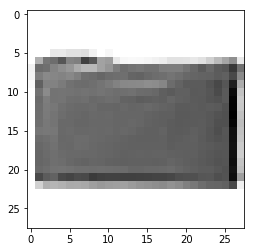

In [5]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

In [6]:
pick = np.random.choice(60000, 5, replace=False)
pick[1]

8324

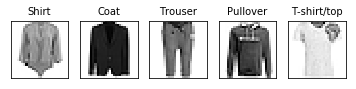

In [7]:
for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [8]:
x_train =x_train/255
x_test =x_test/255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train= x_train.reshape(60000,784)

In [12]:
a=np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
b=np.reshape(a,12)
print (b)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [13]:
x_test= x_test.reshape(10000,784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train=to_categorical(y_train,10)

In [16]:
y_test=to_categorical(y_test,10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [97]:
model = Sequential()

In [98]:
model.add(Dense(128,input_dim=784,activation='tanh'))

In [99]:
model.add(Dense(256,activation='tanh'))

In [100]:
model.add(Dense(10,activation='softmax'))

In [101]:
model.compile(loss='mse',optimizer=SGD(lr=0.01),metrics=['accuracy'])

In [102]:
model.summary()
#128*784+128=100480

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0894 - accuracy: 0.1546
Epoch 2/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0862 - accuracy: 0.3032
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0825 - accuracy: 0.4795
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0778 - accuracy: 0.5372
Epoch 5/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0723 - accuracy: 0.5347
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0667 - accuracy: 0.5539
Epoch 7/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0614 - accuracy: 0.6157
Epoch 8/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0564 - accuracy: 0.6540
Epoch 9/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0525 - accuracy: 0.6649
Epoch 10/20
60

In [26]:
result= model.predict_classes(x_test)

神經網路預測是: Ankle boot


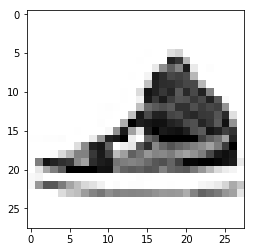

In [86]:
n=1288
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')
